In [ ]:
import csv
from pathlib import Path
import io
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Run the code below, and upload crispKreme.csv from your laptop

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving crispKreme.csv to crispKreme.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['crispKreme.csv']), encoding='utf-8-sig')
df_original = df.copy()
df

,TransactionNo,Items,DateTime,DayType,Location,Date,Year,Month_Number,Day_Number,Hour,Month,Day
0,1,Original Glazed,2016-10-30 09:58:11,Weekend,Jurong,2016-10-30,2016,10,6,Morning,October,Sunday
1,2,Glazed Chocolate Cake,2016-10-30 10:05:34,Weekend,Jurong,2016-10-30,2016,10,6,Morning,October,Sunday
2,2,Glazed Chocolate Cake,2016-10-30 10:05:34,Weekend,Vivo,2016-10-30,2016,10,6,Morning,October,Sunday
3,3,Drinks,2016-10-30 10:07:57,Weekend,Vivo,2016-10-30,2016,10,6,Morning,October,Sunday
4,3,Chocolate Iced Glazed,2016-10-30 10:07:57,Weekend,Vivo,2016-10-30,2016,10,6,Morning,October,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...
20502,9682,Original Glazed,2017-09-04 14:32:58,Weekend,Jurong,2017-09-04,2017,9,0,Afternoon,September,Monday
20503,9682,Glazed Chocolate Cake,2017-09-04 14:32:58,Weekend,Vivo,2017-09-04,2017,9,0,Afternoon,September,Monday
20504,9683,Original Glazed,2017-09-04 14:57:06,Weekend,Vivo,2017-09-04,2017,9,0,Afternoon,September,Monday
20505,9683,Glazed Chocolate Cake,2017-09-04 14:57:06,Weekend,Jurong,2017-09-04,2017,9,0,Afternoon,September,Monday


So general plan:
1. Drop everything except Items, DateTime and Location
2. One hot encode Items and Location
3. Vectorise DateTime
4. Plug into an NN model

In [ ]:
df = df[['DateTime', 'Location', 'Items']]
# df = df[['DateTime', 'Location', 'Items', 'Hour']]
df.sort_values(by='DateTime', inplace=True)
df.reset_index(drop=True, inplace=True)


<ipython-input-4-53e7f5b20659>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by='DateTime', inplace=True)


In [ ]:
df_edited = df.copy()

In [ ]:
df

,DateTime,Location,Items
0,2016-01-11 07:51:20,Jurong,Original Glazed
1,2016-01-11 07:51:20,Vivo,Glazed Chocolate Cake
2,2016-01-11 08:20:50,Vivo,Glazed Chocolate Cake
3,2016-01-11 08:20:50,Vivo,Original Glazed
4,2016-01-11 08:22:28,Jurong,Glazed Chocolate Cake
...,...,...,...
20502,2017-12-03 15:45:55,Jurong,Chocolate Iced Glazed
20503,2017-12-03 16:28:00,Jurong,Drinks
20504,2017-12-03 16:28:00,Jurong,Drinks
20505,2017-12-03 16:28:00,Vivo,Original Glazed


In [ ]:
df["Year"]=pd.to_datetime(df["DateTime"]).dt.year
df["Month"]=pd.to_datetime(df["DateTime"]).dt.month
df["Day"]=pd.to_datetime(df["DateTime"]).dt.day
df["Day_Name"]=pd.to_datetime(df["DateTime"]).dt.weekday

<ipython-input-7-1bcbf53fae25>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Year"]=pd.to_datetime(df["DateTime"]).dt.year
<ipython-input-7-1bcbf53fae25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Month"]=pd.to_datetime(df["DateTime"]).dt.month
<ipython-input-7-1bcbf53fae25>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [ ]:
df.loc[(df.Month == 2) & (df.Day == 20) & (df.Location == 'Jurong')]

,DateTime,Location,Items,Year,Month,Day,Day_Name
12300,2017-02-20 08:21:13,Jurong,Original Glazed,2017,2,20,0
12307,2017-02-20 10:24:37,Jurong,Original Glazed,2017,2,20,0
12308,2017-02-20 10:25:27,Jurong,Original Glazed,2017,2,20,0
12310,2017-02-20 10:37:48,Jurong,Original Glazed,2017,2,20,0
12312,2017-02-20 10:42:04,Jurong,Glazed Chocolate Cake,2017,2,20,0
...,...,...,...,...,...,...,...
12404,2017-02-20 16:19:36,Jurong,Glazed Chocolate Cake,2017,2,20,0
12405,2017-02-20 16:24:59,Jurong,Original Glazed,2017,2,20,0
12408,2017-02-20 16:26:39,Jurong,Original Glazed,2017,2,20,0
12409,2017-02-20 16:28:40,Jurong,Glazed Chocolate Cake,2017,2,20,0


In [ ]:
df

,DateTime,Location,Items,Year,Month,Day,Day_Name
0,2016-01-11 07:51:20,Jurong,Original Glazed,2016,1,11,0
1,2016-01-11 07:51:20,Vivo,Glazed Chocolate Cake,2016,1,11,0
2,2016-01-11 08:20:50,Vivo,Glazed Chocolate Cake,2016,1,11,0
3,2016-01-11 08:20:50,Vivo,Original Glazed,2016,1,11,0
4,2016-01-11 08:22:28,Jurong,Glazed Chocolate Cake,2016,1,11,0
...,...,...,...,...,...,...,...
20502,2017-12-03 15:45:55,Jurong,Chocolate Iced Glazed,2017,12,3,6
20503,2017-12-03 16:28:00,Jurong,Drinks,2017,12,3,6
20504,2017-12-03 16:28:00,Jurong,Drinks,2017,12,3,6
20505,2017-12-03 16:28:00,Vivo,Original Glazed,2017,12,3,6


In [ ]:
#One hot encode Items
one_hot = pd.get_dummies(df.Items, prefix='Bought')
print(one_hot.head())

   Bought_Chocolate Iced Glazed  Bought_Drinks  Bought_Glazed Chocolate Cake  \
0                             0              0                             0   
1                             0              0                             1   
2                             0              0                             1   
3                             0              0                             0   
4                             0              0                             1   

   Bought_Original Glazed  
0                       1  
1                       0  
2                       0  
3                       1  
4                       0  


In [ ]:
#One hot encode Location
one_hot = pd.get_dummies(df.Location, prefix='Location')
print(one_hot.head())

   Location_Jurong  Location_Vivo
0                1              0
1                1              0
2                1              0
3                1              0
4                1              0


In [ ]:
df = df.drop('Items',axis = 1)
df = df.join(one_hot)

In [ ]:
df

,DateTime,Location,Year,Month,Day,Day_Name,Bought_Chocolate Iced Glazed,Bought_Drinks,Bought_Glazed Chocolate Cake,Bought_Original Glazed
0,2016-01-11 07:51:20,Jurong,2016,1,11,0,0,0,0,1
1,2016-01-11 07:51:20,Vivo,2016,1,11,0,0,0,1,0
2,2016-01-11 08:20:50,Vivo,2016,1,11,0,0,0,1,0
3,2016-01-11 08:20:50,Vivo,2016,1,11,0,0,0,0,1
4,2016-01-11 08:22:28,Jurong,2016,1,11,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
20502,2017-12-03 15:45:55,Jurong,2017,12,3,6,1,0,0,0
20503,2017-12-03 16:28:00,Jurong,2017,12,3,6,0,1,0,0
20504,2017-12-03 16:28:00,Jurong,2017,12,3,6,0,1,0,0
20505,2017-12-03 16:28:00,Vivo,2017,12,3,6,0,0,0,1


In [ ]:
df1 = df.copy()
df = df.groupby(['Location', 'Year', 'Month', 'Day', 'Day_Name'], as_index = False).sum()

# df1 is to be exported for data viz
# df1 = df1.groupby(['Location', 'Year', 'Month', 'Day', 'Day_Name', 'Hour'], as_index=False).sum()

In [ ]:
df

,Location,Year,Month,Day,Day_Name,Bought_Chocolate Iced Glazed,Bought_Drinks,Bought_Glazed Chocolate Cake,Bought_Original Glazed
0,Jurong,2016,1,11,0,14,3,34,34
1,Jurong,2016,1,12,1,7,2,16,25
2,Jurong,2016,2,11,3,15,6,39,35
3,Jurong,2016,2,12,4,11,5,15,30
4,Jurong,2016,3,11,4,32,13,30,35
...,...,...,...,...,...,...,...,...,...
312,Vivo,2017,11,2,3,13,9,29,39
313,Vivo,2017,11,3,4,17,7,26,29
314,Vivo,2017,12,1,4,10,2,7,15
315,Vivo,2017,12,2,5,14,6,8,24


In [ ]:
df.sort_values(by=['Location', 'Year', 'Month', 'Day'], inplace=True)
df.reset_index(drop=True, inplace=True)

#df1.sort_values(by=['Location', 'Year', 'Month', 'Day'], inplace=True)
#df1.reset_index(drop=True, inplace=True)

In [ ]:
df

,Location,Year,Month,Day,Day_Name,Bought_Chocolate Iced Glazed,Bought_Drinks,Bought_Glazed Chocolate Cake,Bought_Original Glazed
0,Jurong,2016,1,11,0,14,3,34,34
1,Jurong,2016,1,12,1,7,2,16,25
2,Jurong,2016,2,11,3,15,6,39,35
3,Jurong,2016,2,12,4,11,5,15,30
4,Jurong,2016,3,11,4,32,13,30,35
...,...,...,...,...,...,...,...,...,...
312,Vivo,2017,11,2,3,13,9,29,39
313,Vivo,2017,11,3,4,17,7,26,29
314,Vivo,2017,12,1,4,10,2,7,15
315,Vivo,2017,12,2,5,14,6,8,24


In [ ]:
df_for_tableau = df.copy()

In [ ]:
df_for_tableau["Month_Name"]=df["Month"].replace((1,2,3,4,5,6,7,8,9,10,11,12),('January','February','March','April','May' ,'June' ,'July' ,'August' ,'September','October' ,'November' ,'December' ))
df_for_tableau["Day_Name"]=df["Day_Name"].replace((0,1,2,3,4,5,6),('Monday','Tuesday' ,'Wednesday' ,'Thursday','Friday' ,'Saturday' ,'Sunday'))

#df1["Month_Name"] = df1["Month"].replace((1,2,3,4,5,6,7,8,9,10,11,12),('January','February','March','April','May' ,'June' ,'July' ,'August' ,'September','October' ,'November' ,'December' ))
#df1["Day_Name"] = df1["Day_Name"].replace((0,1,2,3,4,5,6),('Monday','Tuesday' ,'Wednesday' ,'Thursday','Friday' ,'Saturday' ,'Sunday'))


In [ ]:
df_for_tableau

,Location,Year,Month,Day,Day_Name,Bought_Chocolate Iced Glazed,Bought_Drinks,Bought_Glazed Chocolate Cake,Bought_Original Glazed,Month_Name
0,Jurong,2016,1,11,Monday,14,3,34,34,January
1,Jurong,2016,1,12,Tuesday,7,2,16,25,January
2,Jurong,2016,2,11,Thursday,15,6,39,35,February
3,Jurong,2016,2,12,Friday,11,5,15,30,February
4,Jurong,2016,3,11,Friday,32,13,30,35,March
...,...,...,...,...,...,...,...,...,...,...
312,Vivo,2017,11,2,Thursday,13,9,29,39,November
313,Vivo,2017,11,3,Friday,17,7,26,29,November
314,Vivo,2017,12,1,Friday,10,2,7,15,December
315,Vivo,2017,12,2,Saturday,14,6,8,24,December


In [ ]:
df_for_tableau.to_csv('crispKremeTableau.csv', index=False, encoding='utf-8-sig')
# files.download('crispKremeTableau.csv')

#df1.to_csv('crispKremeViz.csv', index=False, encoding='utf-8-sig')

In [ ]:
df.loc[(df.Month == 2) & (df.Day == 20)]

,Location,Year,Month,Day,Day_Name,Bought_Chocolate Iced Glazed,Bought_Drinks,Bought_Glazed Chocolate Cake,Bought_Original Glazed
94,Jurong,2017,2,20,0,10,7,12,33
252,Vivo,2017,2,20,0,8,5,17,22


In [ ]:
df['Location'].value_counts()

Jurong    159
Vivo      158
Name: Location, dtype: int64

In [ ]:
#One hot encode Location
one_hot = pd.get_dummies(df.Location, prefix='Location')
print(one_hot.head())

   Location_Jurong  Location_Vivo
0                1              0
1                1              0
2                1              0
3                1              0
4                1              0


In [ ]:
df = df.drop('Location',axis = 1)
df = df.join(one_hot)

In [ ]:
df

,Year,Month,Day,Day_Name,Bought_Chocolate Iced Glazed,Bought_Drinks,Bought_Glazed Chocolate Cake,Bought_Original Glazed,Location_Jurong,Location_Vivo
0,2016,1,11,0,14,3,34,34,1,0
1,2016,1,12,1,7,2,16,25,1,0
2,2016,2,11,3,15,6,39,35,1,0
3,2016,2,12,4,11,5,15,30,1,0
4,2016,3,11,4,32,13,30,35,1,0
...,...,...,...,...,...,...,...,...,...,...
312,2017,11,2,3,13,9,29,39,0,1
313,2017,11,3,4,17,7,26,29,0,1
314,2017,12,1,4,10,2,7,15,0,1
315,2017,12,2,5,14,6,8,24,0,1


In [ ]:
df['Year'].value_counts().sort_index()

2016    122
2017    195
Name: Year, dtype: int64

In [ ]:
replacements = {
    2016: 0,
    2017: 1
}

df['Year'] = df['Year'].map(replacements)

In [ ]:
df['Year'].value_counts().sort_index()

0    122
1    195
Name: Year, dtype: int64

In [ ]:
df['Month'].value_counts().sort_index()

1     49
2     42
3     50
4     12
5     12
6     12
7     12
8     12
9     12
10    14
11    46
12    44
Name: Month, dtype: int64

In [ ]:
df['Day'].value_counts().sort_index()

1     21
2     24
3     24
4     18
11    24
12    24
13    10
14    10
15    10
16    10
17    10
18    10
19    10
20    10
21    10
22    10
23    10
24    10
25     8
26     8
27    10
28    10
29     8
30    10
31     8
Name: Day, dtype: int64

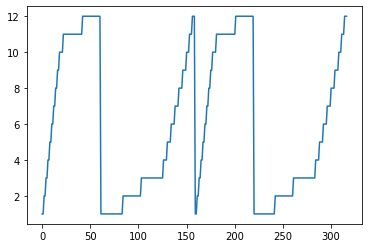

In [ ]:
ax = df['Month'].plot() #to see the cyclical nature of time, BEFORE preprocessing

In [ ]:
def encode(df, col_name, max_val):
    df[col_name + '_sin'] = np.sin(2 * np.pi * df[col_name]/max_val)
    df[col_name + '_cos'] = np.cos(2 * np.pi * df[col_name]/max_val)
    return df

In [ ]:
df = encode(df, 'Month', 12)
df = encode(df, 'Day', 31)
df = encode(df, 'Day_Name', 6)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


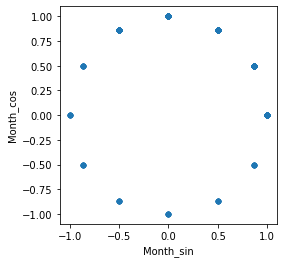

In [ ]:
ax = df.plot.scatter('Month_sin', 'Month_cos').set_aspect('equal') #to see that this method is a better representation of time

In [ ]:
df

,Year,Month,Day,Day_Name,Bought_Chocolate Iced Glazed,Bought_Drinks,Bought_Glazed Chocolate Cake,Bought_Original Glazed,Location_Jurong,Location_Vivo,Month_sin,Month_cos,Day_sin,Day_cos,Day_Name_sin,Day_Name_cos
0,0,1,11,0,14,3,34,34,1,0,5.000000e-01,8.660254e-01,0.790776,-0.612106,0.000000e+00,1.0
1,0,1,12,1,7,2,16,25,1,0,5.000000e-01,8.660254e-01,0.651372,-0.758758,8.660254e-01,0.5
2,0,2,11,3,15,6,39,35,1,0,8.660254e-01,5.000000e-01,0.790776,-0.612106,1.224647e-16,-1.0
3,0,2,12,4,11,5,15,30,1,0,8.660254e-01,5.000000e-01,0.651372,-0.758758,-8.660254e-01,-0.5
4,0,3,11,4,32,13,30,35,1,0,1.000000e+00,6.123234e-17,0.790776,-0.612106,-8.660254e-01,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,1,11,2,3,13,9,29,39,0,1,-5.000000e-01,8.660254e-01,0.394356,0.918958,1.224647e-16,-1.0
313,1,11,3,4,17,7,26,29,0,1,-5.000000e-01,8.660254e-01,0.571268,0.820763,-8.660254e-01,-0.5
314,1,12,1,4,10,2,7,15,0,1,-2.449294e-16,1.000000e+00,0.201299,0.979530,-8.660254e-01,-0.5
315,1,12,2,5,14,6,8,24,0,1,-2.449294e-16,1.000000e+00,0.394356,0.918958,-8.660254e-01,0.5


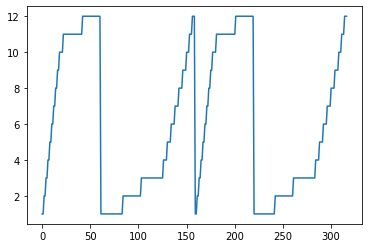

In [ ]:
ax = df['Month'].plot() #to see the cyclical nature of time

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


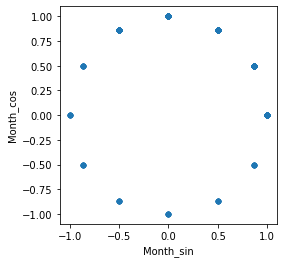

In [ ]:
ax = df.plot.scatter('Month_sin', 'Month_cos').set_aspect('equal') #to see that this method is a better representation of time

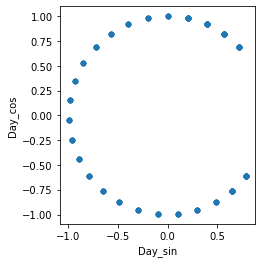

In [ ]:
ax = df.plot.scatter('Day_sin', 'Day_cos').set_aspect('equal') #same thing for day

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2)

In [ ]:
df_train.shape

(253, 16)

In [ ]:
df_train

,Year,Month,Day,Day_Name,Bought_Chocolate Iced Glazed,Bought_Drinks,Bought_Glazed Chocolate Cake,Bought_Original Glazed,Location_Jurong,Location_Vivo,Month_sin,Month_cos,Day_sin,Day_cos,Day_Name_sin,Day_Name_cos
222,1,1,4,2,16,8,15,33,0,1,5.000000e-01,8.660254e-01,0.724793,0.688967,8.660254e-01,-0.5
167,0,5,11,2,34,17,23,50,0,1,5.000000e-01,-8.660254e-01,0.790776,-0.612106,8.660254e-01,-0.5
271,1,3,19,6,12,6,12,27,0,1,1.000000e+00,6.123234e-17,-0.651372,-0.758758,-2.449294e-16,1.0
135,1,6,2,4,17,4,24,27,1,0,1.224647e-16,-1.000000e+00,0.394356,0.918958,-8.660254e-01,-0.5
209,0,12,19,0,11,4,19,29,0,1,-2.449294e-16,1.000000e+00,-0.651372,-0.758758,0.000000e+00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,0,12,28,2,6,7,10,29,0,1,-2.449294e-16,1.000000e+00,-0.571268,0.820763,8.660254e-01,-0.5
76,1,1,24,1,9,8,22,25,1,0,5.000000e-01,8.660254e-01,-0.988468,0.151428,8.660254e-01,0.5
52,0,12,21,2,17,1,11,35,1,0,-2.449294e-16,1.000000e+00,-0.897805,-0.440394,8.660254e-01,-0.5
211,0,12,21,2,5,6,17,27,0,1,-2.449294e-16,1.000000e+00,-0.897805,-0.440394,8.660254e-01,-0.5


In [ ]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Activation, Dropout
from keras.optimizers import Adam

def train_model(X_train, y_train, X_test, y_test, epochs):
    model = Sequential(
        [
            Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
            Dropout(0.3),
            Dense(64, activation="relu"),
            Dense(64, activation="relu"),
            Dense(y_train.shape[1], activation="linear")
        ]
    )
    model.compile(optimizer=Adam(), loss="mean_squared_error")
    
    history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test))
    return model, history

In [ ]:
X_train = df_train[['Year', 'Month_sin', 'Month_cos', 'Day_sin', 'Day_cos', 'Location_Jurong', 'Location_Vivo']]
X_test  = df_test[['Year', 'Month_sin', 'Month_cos', 'Day_sin', 'Day_cos', 'Location_Jurong', 'Location_Vivo']]
y_train = df_train[['Bought_Chocolate Iced Glazed', 'Bought_Drinks', 'Bought_Glazed Chocolate Cake', 'Bought_Original Glazed']]
y_test  = df_test[['Bought_Chocolate Iced Glazed', 'Bought_Drinks', 'Bought_Glazed Chocolate Cake', 'Bought_Original Glazed']]

In [ ]:
X_train.shape[1]

7

In [ ]:
y_train.shape[1]

4

In [ ]:
model, history = train_model(
    X_train,
    y_train,
    X_test,
    y_test,
    epochs=20
)

Epoch 1/20
8/8 [==============================] - 1s 31ms/step - loss: 368.8536 - val_loss: 352.5732
Epoch 2/20
8/8 [==============================] - 0s 9ms/step - loss: 357.3933 - val_loss: 338.7637
Epoch 3/20
8/8 [==============================] - 0s 7ms/step - loss: 337.9887 - val_loss: 315.2606
Epoch 4/20
8/8 [==============================] - 0s 7ms/step - loss: 307.7867 - val_loss: 274.3163
Epoch 5/20
8/8 [==============================] - 0s 8ms/step - loss: 255.6556 - val_loss: 208.4354
Epoch 6/20
8/8 [==============================] - 0s 9ms/step - loss: 180.0486 - val_loss: 124.8301
Epoch 7/20
8/8 [==============================] - 0s 8ms/step - loss: 107.9438 - val_loss: 70.5062
Epoch 8/20
8/8 [==============================] - 0s 6ms/step - loss: 81.8686 - val_loss: 66.9263
Epoch 9/20
8/8 [==============================] - 0s 8ms/step - loss: 71.7566 - val_loss: 57.6674
Epoch 10/20
8/8 [==============================] - 0s 7ms/step - loss: 61.6987 - val_loss: 54.8144
Epoch

In [ ]:
test_loss = model.evaluate(X_test, y_test)
print('Test MSE:', test_loss)

2/2 [==============================] - 0s 6ms/step - loss: 49.0593
Test MSE: 49.05934524536133


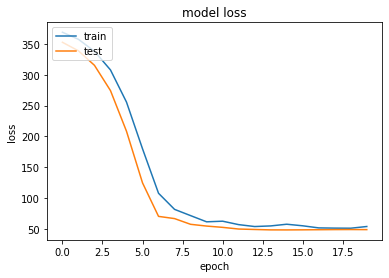

In [ ]:
plt.plot(history.history["loss"]) 
plt.plot(history.history["val_loss"]) 
plt.title("model loss") 
plt.ylabel("loss") 
plt.xlabel("epoch") 
plt.legend(["train", "test"], loc="upper left") 
plt.show() 

In [ ]:
import math

def pred(Year, Month, Day, Location):
  Month_sin = math.sin(2 * math.pi * Month / 12)
  Month_cos = math.cos(2 * math.pi * Month / 12)

  Day_sin = math.sin(2 * math.pi * Day / 12)
  Day_cos = math.cos(2 * math.pi * Day / 12)

  user_list = [[Year, Month_sin, Month_cos, Day_sin, Day_cos, 0, 0]]

  if Location == 'Jurong':
    user_list[0][5] = 1

  # print(user_list)

  predictions = model.predict(user_list)

  df_predictions = pd.DataFrame()
  df_predictions['Items'] = ['Bought_Chocolate Iced Glazed', 'Bought_Drinks', 'Bought_Glazed Chocolate Cake', 'Bought_Original Glazed']
  df_predictions['Sales_Predictions'] = predictions[0]

  return df_predictions

In [ ]:
pred(1, 12, 25, 'Jurong') #generate predicted sales of each item on 25 December 2017 (1 is cus encoded year) in Jurong outlet

1/1 [==============================] - 0s 120ms/step


,Items,Sales_Predictions
0,Bought_Chocolate Iced Glazed,14.507426
1,Bought_Drinks,6.991570
2,Bought_Glazed Chocolate Cake,17.411697
3,Bought_Original Glazed,29.537296


# Predict for the next 1 year (whole of 2018)

In [ ]:
#df should follow this structure:
X_test

,Year,Month_sin,Month_cos,Day_sin,Day_cos,Location_Jurong,Location_Vivo
81,1,5.000000e-01,8.660254e-01,-0.394356,0.918958,1,0
239,1,5.000000e-01,8.660254e-01,-0.394356,0.918958,0,1
224,1,5.000000e-01,8.660254e-01,0.299363,-0.954139,0,1
179,0,-8.660254e-01,5.000000e-01,-0.201299,0.979530,0,1
262,1,1.000000e+00,6.123234e-17,0.394356,0.918958,0,1
...,...,...,...,...,...,...,...
132,1,5.000000e-01,-8.660254e-01,0.571268,0.820763,1,0
34,0,-5.000000e-01,8.660254e-01,-0.998717,-0.050649,1,0
8,0,5.000000e-01,-8.660254e-01,0.790776,-0.612106,1,0
218,0,-2.449294e-16,1.000000e+00,-0.201299,0.979530,0,1


In [ ]:
df_predict_jurong = pd.DataFrame(columns=['Date', 'Location_Jurong', 'Location_Vivo'])

In [ ]:
df_predict_jurong.Date = pd.date_range(start='1/1/2018', end='12/31/2018')
df_predict_jurong.Location_Jurong.fillna(1, inplace = True)
df_predict_jurong.Location_Vivo.fillna(0, inplace = True)

In [ ]:
df_predict_jurong["Year"]=pd.to_datetime(df_predict_jurong["Date"]).dt.year
df_predict_jurong["Month"]=pd.to_datetime(df_predict_jurong["Date"]).dt.month
df_predict_jurong["Day"]=pd.to_datetime(df_predict_jurong["Date"]).dt.day

In [ ]:
df_predict_jurong_original = df_predict_jurong.copy()
df_predict_jurong_original

,Date,Location_Jurong,Location_Vivo,Year,Month,Day
0,2018-01-01,1,0,2018,1,1
1,2018-01-02,1,0,2018,1,2
2,2018-01-03,1,0,2018,1,3
3,2018-01-04,1,0,2018,1,4
4,2018-01-05,1,0,2018,1,5
...,...,...,...,...,...,...
360,2018-12-27,1,0,2018,12,27
361,2018-12-28,1,0,2018,12,28
362,2018-12-29,1,0,2018,12,29
363,2018-12-30,1,0,2018,12,30


In [ ]:
df_predict_jurong = encode(df_predict_jurong, 'Month', 12)

df_predict_jurong = encode(df_predict_jurong, 'Day', 31)

In [ ]:
df_predict_jurong.Year = df_predict_jurong.Year.replace(2018, 2)

In [ ]:
df_predict_jurong

,Date,Location_Jurong,Location_Vivo,Year,Month,Day,Month_sin,Month_cos,Day_sin,Day_cos
0,2018-01-01,1,0,2,1,1,5.000000e-01,0.866025,2.012985e-01,0.979530
1,2018-01-02,1,0,2,1,2,5.000000e-01,0.866025,3.943559e-01,0.918958
2,2018-01-03,1,0,2,1,3,5.000000e-01,0.866025,5.712682e-01,0.820763
3,2018-01-04,1,0,2,1,4,5.000000e-01,0.866025,7.247928e-01,0.688967
4,2018-01-05,1,0,2,1,5,5.000000e-01,0.866025,8.486443e-01,0.528964
...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,1,0,2,12,27,-2.449294e-16,1.000000,-7.247928e-01,0.688967
361,2018-12-28,1,0,2,12,28,-2.449294e-16,1.000000,-5.712682e-01,0.820763
362,2018-12-29,1,0,2,12,29,-2.449294e-16,1.000000,-3.943559e-01,0.918958
363,2018-12-30,1,0,2,12,30,-2.449294e-16,1.000000,-2.012985e-01,0.979530


In [ ]:
#now we rearrange the columns and remove irrelevant ones
df_predict_jurong = df_predict_jurong[['Year', 'Month_sin', 'Month_cos', 'Day_sin', 'Day_cos', 'Location_Jurong', 'Location_Vivo']]

In [ ]:
df_predict_jurong

,Year,Month_sin,Month_cos,Day_sin,Day_cos,Location_Jurong,Location_Vivo
0,2,5.000000e-01,0.866025,2.012985e-01,0.979530,1,0
1,2,5.000000e-01,0.866025,3.943559e-01,0.918958,1,0
2,2,5.000000e-01,0.866025,5.712682e-01,0.820763,1,0
3,2,5.000000e-01,0.866025,7.247928e-01,0.688967,1,0
4,2,5.000000e-01,0.866025,8.486443e-01,0.528964,1,0
...,...,...,...,...,...,...,...
360,2,-2.449294e-16,1.000000,-7.247928e-01,0.688967,1,0
361,2,-2.449294e-16,1.000000,-5.712682e-01,0.820763,1,0
362,2,-2.449294e-16,1.000000,-3.943559e-01,0.918958,1,0
363,2,-2.449294e-16,1.000000,-2.012985e-01,0.979530,1,0


In [ ]:
df_predict_vivo = df_predict_jurong.copy() #to use later for Vivo

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


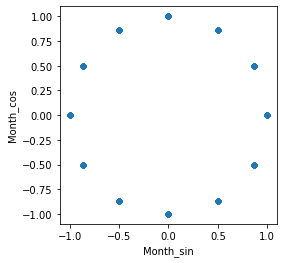

In [ ]:
ax = df_predict_jurong.plot.scatter('Month_sin', 'Month_cos').set_aspect('equal') #just to confirm the dates are arranged in order

it's predicting time

In [ ]:
predictions = model.predict(df_predict_jurong)

12/12 [==============================] - 0s 2ms/step


In [ ]:
predictions

array([[15.695349 ,  7.571414 , 18.796988 , 32.063778 ],
       [15.681531 ,  7.607055 , 18.712059 , 31.921413 ],
       [15.698825 ,  7.6587815, 18.68753  , 31.83885  ],
       ...,
       [15.867114 ,  7.637142 , 19.347275 , 32.91608  ],
       [15.803498 ,  7.6376657, 19.192467 , 32.684628 ],
       [15.744857 ,  7.648062 , 19.049286 , 32.45023  ]], dtype=float32)

In [ ]:
df_predict_jurong_predictions = pd.DataFrame(data = predictions, columns=['Bought_Chocolate Iced Glazed', 'Bought_Drinks', 'Bought_Glazed Chocolate Cake', 'Bought_Original Glazed'])

In [ ]:
df_predict_jurong_predictions

,Bought_Chocolate Iced Glazed,Bought_Drinks,Bought_Glazed Chocolate Cake,Bought_Original Glazed
0,15.695349,7.571414,18.796988,32.063778
1,15.681531,7.607055,18.712059,31.921413
2,15.698825,7.658782,18.687531,31.838850
3,15.689971,7.678550,18.633560,31.699430
4,15.599730,7.651304,18.488657,31.414663
...,...,...,...,...
360,16.037327,7.670682,19.693436,33.404724
361,15.954566,7.658472,19.521969,33.177998
362,15.867114,7.637142,19.347275,32.916080
363,15.803498,7.637666,19.192467,32.684628


In [ ]:
# df_predict_jurong_predictions = df_predict_jurong_original + df_predict_jurong_predictions
df_predict_jurong_predictions = pd.concat([df_predict_jurong_original, df_predict_jurong_predictions], axis=1)

In [ ]:
df_predict_jurong_predictions = df_predict_jurong_predictions.drop('Date', axis=1)

In [ ]:
df_predict_jurong_predictions

,Location_Jurong,Location_Vivo,Year,Month,Day,Bought_Chocolate Iced Glazed,Bought_Drinks,Bought_Glazed Chocolate Cake,Bought_Original Glazed
0,1,0,2018,1,1,15.695349,7.571414,18.796988,32.063778
1,1,0,2018,1,2,15.681531,7.607055,18.712059,31.921413
2,1,0,2018,1,3,15.698825,7.658782,18.687531,31.838850
3,1,0,2018,1,4,15.689971,7.678550,18.633560,31.699430
4,1,0,2018,1,5,15.599730,7.651304,18.488657,31.414663
...,...,...,...,...,...,...,...,...,...
360,1,0,2018,12,27,16.037327,7.670682,19.693436,33.404724
361,1,0,2018,12,28,15.954566,7.658472,19.521969,33.177998
362,1,0,2018,12,29,15.867114,7.637142,19.347275,32.916080
363,1,0,2018,12,30,15.803498,7.637666,19.192467,32.684628


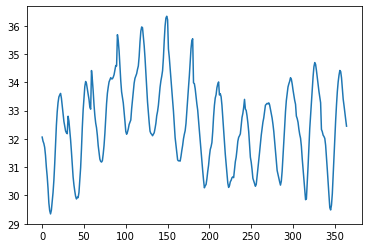

In [ ]:
ax = df_predict_jurong_predictions['Bought_Original Glazed'].plot() #plot predicted sales of Original Glazed every day in Jurong

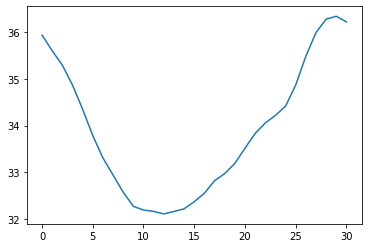

In [ ]:
ax = df_predict_jurong_predictions[df_predict_jurong_predictions.Month == 5].reset_index()['Bought_Original Glazed'].plot() #prediction for March

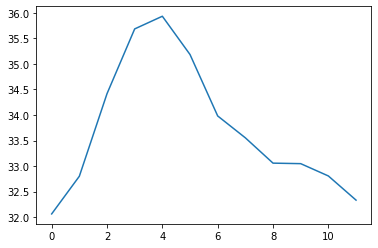

In [ ]:
ax = df_predict_jurong_predictions[df_predict_jurong_predictions.Day == 1].reset_index()['Bought_Original Glazed'].plot() #prediction for every start of the month

# now we do the same thing for Vivo

In [ ]:
df_predict_vivo

,Year,Month_sin,Month_cos,Day_sin,Day_cos,Location_Jurong,Location_Vivo
0,2,5.000000e-01,0.866025,2.012985e-01,0.979530,1,0
1,2,5.000000e-01,0.866025,3.943559e-01,0.918958,1,0
2,2,5.000000e-01,0.866025,5.712682e-01,0.820763,1,0
3,2,5.000000e-01,0.866025,7.247928e-01,0.688967,1,0
4,2,5.000000e-01,0.866025,8.486443e-01,0.528964,1,0
...,...,...,...,...,...,...,...
360,2,-2.449294e-16,1.000000,-7.247928e-01,0.688967,1,0
361,2,-2.449294e-16,1.000000,-5.712682e-01,0.820763,1,0
362,2,-2.449294e-16,1.000000,-3.943559e-01,0.918958,1,0
363,2,-2.449294e-16,1.000000,-2.012985e-01,0.979530,1,0


In [ ]:
df_predict_vivo.Location_Jurong = df_predict_vivo.Location_Jurong.replace(1, 0)
df_predict_vivo.Location_Vivo = df_predict_vivo.Location_Vivo.replace(0, 1)

In [ ]:
df_predict_vivo

,Year,Month_sin,Month_cos,Day_sin,Day_cos,Location_Jurong,Location_Vivo
0,2,5.000000e-01,0.866025,2.012985e-01,0.979530,0,1
1,2,5.000000e-01,0.866025,3.943559e-01,0.918958,0,1
2,2,5.000000e-01,0.866025,5.712682e-01,0.820763,0,1
3,2,5.000000e-01,0.866025,7.247928e-01,0.688967,0,1
4,2,5.000000e-01,0.866025,8.486443e-01,0.528964,0,1
...,...,...,...,...,...,...,...
360,2,-2.449294e-16,1.000000,-7.247928e-01,0.688967,0,1
361,2,-2.449294e-16,1.000000,-5.712682e-01,0.820763,0,1
362,2,-2.449294e-16,1.000000,-3.943559e-01,0.918958,0,1
363,2,-2.449294e-16,1.000000,-2.012985e-01,0.979530,0,1


In [ ]:
predictions = model.predict(df_predict_vivo)

12/12 [==============================] - 0s 2ms/step


In [ ]:
predictions

array([[13.5114   ,  6.662269 , 15.978713 , 27.197779 ],
       [13.367767 ,  6.640449 , 15.772525 , 26.883493 ],
       [13.244797 ,  6.6282177, 15.584224 , 26.582758 ],
       ...,
       [13.68967  ,  6.6999393, 16.427422 , 27.913328 ],
       [13.692536 ,  6.7586246, 16.39346  , 27.890688 ],
       [13.635052 ,  6.7870526, 16.280441 , 27.721094 ]], dtype=float32)

In [ ]:
df_predict_vivo_predictions = pd.DataFrame(data = predictions, columns=['Bought_Chocolate Iced Glazed', 'Bought_Drinks', 'Bought_Glazed Chocolate Cake', 'Bought_Original Glazed'])

In [ ]:
df_predict_vivo_predictions

,Bought_Chocolate Iced Glazed,Bought_Drinks,Bought_Glazed Chocolate Cake,Bought_Original Glazed
0,13.511400,6.662269,15.978713,27.197779
1,13.367767,6.640449,15.772525,26.883493
2,13.244797,6.628218,15.584224,26.582758
3,13.121400,6.600227,15.400012,26.303316
4,13.078344,6.585719,15.316187,26.216890
...,...,...,...,...
360,13.719850,6.600417,16.574009,28.037748
361,13.659680,6.631101,16.444513,27.896799
362,13.689670,6.699939,16.427422,27.913328
363,13.692536,6.758625,16.393459,27.890688


In [ ]:
df_predict_vivo_predictions = pd.concat([df_predict_vivo[['Location_Jurong', 'Location_Vivo']], df_predict_jurong_predictions[['Year', 'Month', 'Day']], df_predict_vivo_predictions], axis=1)

In [ ]:
df_predict_vivo_predictions

,Location_Jurong,Location_Vivo,Year,Month,Day,Bought_Chocolate Iced Glazed,Bought_Drinks,Bought_Glazed Chocolate Cake,Bought_Original Glazed
0,0,1,2018,1,1,13.511400,6.662269,15.978713,27.197779
1,0,1,2018,1,2,13.367767,6.640449,15.772525,26.883493
2,0,1,2018,1,3,13.244797,6.628218,15.584224,26.582758
3,0,1,2018,1,4,13.121400,6.600227,15.400012,26.303316
4,0,1,2018,1,5,13.078344,6.585719,15.316187,26.216890
...,...,...,...,...,...,...,...,...,...
360,0,1,2018,12,27,13.719850,6.600417,16.574009,28.037748
361,0,1,2018,12,28,13.659680,6.631101,16.444513,27.896799
362,0,1,2018,12,29,13.689670,6.699939,16.427422,27.913328
363,0,1,2018,12,30,13.692536,6.758625,16.393459,27.890688


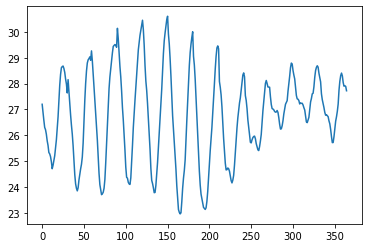

In [ ]:
ax = df_predict_vivo_predictions['Bought_Original Glazed'].plot() #plot predicted sales of Original Glazed every day in Vivo

In [ ]:
df_play_play = df[df.Location_Vivo == 1]

In [ ]:
df_play_play = df_play_play[['Year', 'Month', 'Day', 'Bought_Original Glazed']]
df_play_play.reset_index(inplace=True, drop=True)

In [ ]:
replacements = {
    0: 2016,
    1: 2017
}

df_play_play['Year'] = df_play_play['Year'].map(replacements)

In [ ]:
df_play_play

,Year,Month,Day,Bought_Original Glazed
0,2016,1,11,25
1,2016,1,12,16
2,2016,2,11,24
3,2016,2,12,18
4,2016,3,11,31
...,...,...,...,...
153,2017,11,2,39
154,2017,11,3,29
155,2017,12,1,15
156,2017,12,2,24


In [ ]:
df_play_play2 = pd.concat([df_play_play, df_predict_vivo_predictions[['Year', 'Month', 'Day', 'Bought_Original Glazed']]], ignore_index=True)

In [ ]:
df_play_play2

,Year,Month,Day,Bought_Original Glazed
0,2016,1,11,25.000000
1,2016,1,12,16.000000
2,2016,2,11,24.000000
3,2016,2,12,18.000000
4,2016,3,11,31.000000
...,...,...,...,...
518,2018,12,27,28.037748
519,2018,12,28,27.896799
520,2018,12,29,27.913328
521,2018,12,30,27.890688


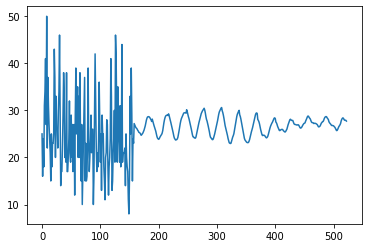

In [ ]:
ax = df_play_play2['Bought_Original Glazed'].plot() #combined past and predicted sales of Original Glazed every day in Vivo

In [ ]:
df_predict_jurong_predictions.to_csv('predictionsJurong.csv', index=False, encoding='utf-8-sig')
df_predict_vivo_predictions.to_csv('predictionsVivo.csv', index=False, encoding='utf-8-sig')

In [ ]:
files.download('predictionsJurong.csv')
files.download('predictionsVivo.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>